In [7]:
 !pip install -U giotto-tda

  Using cached giotto-tda-0.1.4.tar.gz (99 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached plotly-5.15.0-py2.py3-none-any.whl (15.5 MB)
  Using cached python_igraph-0.10.4-py3-none-any.whl
  Using cached tenacity-8.2.2-py3-none-any.whl (24 kB)
  Using cached igraph-0.10.4-cp39-abi3-macosx_11_0_arm64.whl (1.7 MB)
  Using cached texttable-1.6.7-py2.py3-none-any.whl (10 kB)


anceled
ERROR: Operation cancelled by user


In [1]:
!brew install gcc cmake boost

Running `brew update --auto-update`...
==> Homebrew is run entirely by unpaid volunteers. Please consider donating:
  https://github.com/Homebrew/brew#donations

==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
aarch64-elf-gdb                          libvisual-plugins
access                                   libvisual-projectm
ada-url                                  libwpe
adr-viewer                               libzen
aftman                                   llvm@15
aichat                                   lowdown
aicommits                                lpeg
aliyunpan                                mariadb@10.11
amber                                    mdt
ansible@7                                melange
apko                                     meta-package-manager
ares                                     millet
argparse                                 mods
arjun                                    musikcube
arttime                      

######################################################################### 100.0%
==> Fetching libmpc
==> Downloading https://ghcr.io/v2/homebrew/core/libmpc/manifests/1.3.1
######################################################################### 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/libmpc/blobs/sha256:da4ff781bc4
==> Downloading from https://pkg-containers.githubusercontent.com/ghcr1/blobs/sh
######################################################################### 100.0%
==> Fetching lz4
==> Downloading https://ghcr.io/v2/homebrew/core/lz4/manifests/1.9.4
Already downloaded: /Users/anastasiyapunko/Library/Caches/Homebrew/downloads/379e59b981667f9585b33a2ff318769d8edca3ce6fd2e9a67ed291ae3e0cc872--lz4-1.9.4.bottle_manifest.json
==> Downloading https://ghcr.io/v2/homebrew/core/lz4/blobs/sha256:cd29e40287b0a2
Already downloaded: /Users/anastasiyapunko/Library/Caches/Homebrew/downloads/bdbca4231a01d687e54f87627b47f5209cd836fcba5f58353597bb599bea9cbe--lz4--1.9.4.arm64_ve

==> Caveats
==> cmake
To install the CMake documentation, run:
  brew install cmake-docs

Emacs Lisp files have been installed to:
  /opt/homebrew/share/emacs/site-lisp/cmake


In [8]:
!git clone https://github.com/giotto-ai/giotto-tda.git

Cloning into 'giotto-tda'...
remote: Enumerating objects: 13766, done.
remote: Counting objects: 100% (272/272), done.
remote: Compressing objects: 100% (235/235), done.
remote: Total 13766 (delta 129), reused 149 (delta 35), pack-reused 13494
Receiving objects: 100% (13766/13766), 59.69 MiB | 22.68 MiB/s, done.
Resolving deltas: 100% (8230/8230), done.


In [10]:
!cd giotto-tda

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

from gtda.plotting import plot_point_cloud
from gtda.homology import VietorisRipsPersistence
from gtda.plotting import plot_diagram
from gtda.diagrams import PersistenceEntropy
from gtda.diagrams import Scaler, Filtering, BettiCurve, PairwiseDistance
from gtda.pipeline import Pipeline

ModuleNotFoundError: No module named 'gtda'

#EDA

In [ ]:
file_location = '/content/car-t.xlsx'
df = pd.read_excel(file_location)
df

,CAR-T cell infused Dose 106/kg,Age (Years),Sex,Malignancy,Response
0,0.400,66,M,CLL,SD
1,0.700,44,M,DLBCL,SD
2,2.400,55,M,CLL,PD
3,2.200,49,M,DLBCL,SD
4,1.000,44,F,CLL,CR
5,4.600,48,M,MCL,SD
6,0.700,48,M,CLL,PD
7,3.900,63,F,MCL,SD
8,2.200,57,M,MCL,PR
9,7.800,50,M,MCL,SD


In [ ]:
df = pd.get_dummies(df, columns=['Sex', 'Malignancy', 'Response'])
df.dtypes

CAR-T cell infused Dose 106/kg    float64
Age (Years)                         int64
Sex_F                               uint8
Sex_M                               uint8
Malignancy_ALL                      uint8
Malignancy_CLL                      uint8
Malignancy_DLBCL                    uint8
Malignancy_MCL                      uint8
Response_CR                         uint8
Response_NR                         uint8
Response_PD                         uint8
Response_PR                         uint8
Response_SD                         uint8
dtype: object

In [ ]:
df.describe()

,CAR-T cell infused Dose 106/kg,Age (Years),Sex_F,Sex_M,Malignancy_ALL,Malignancy_CLL,Malignancy_DLBCL,Malignancy_MCL,Response_CR,Response_NR,Response_PD,Response_PR,Response_SD
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,2.806037,33.370370,0.425926,0.574074,0.648148,0.148148,0.111111,0.092593,0.518519,0.055556,0.148148,0.074074,0.203704
std,3.182714,20.129108,0.499126,0.499126,0.482032,0.358583,0.317221,0.292582,0.504349,0.231212,0.358583,0.264351,0.406533
min,0.030000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,16.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,26.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,3.850000,48.750000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,16.000000,77.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


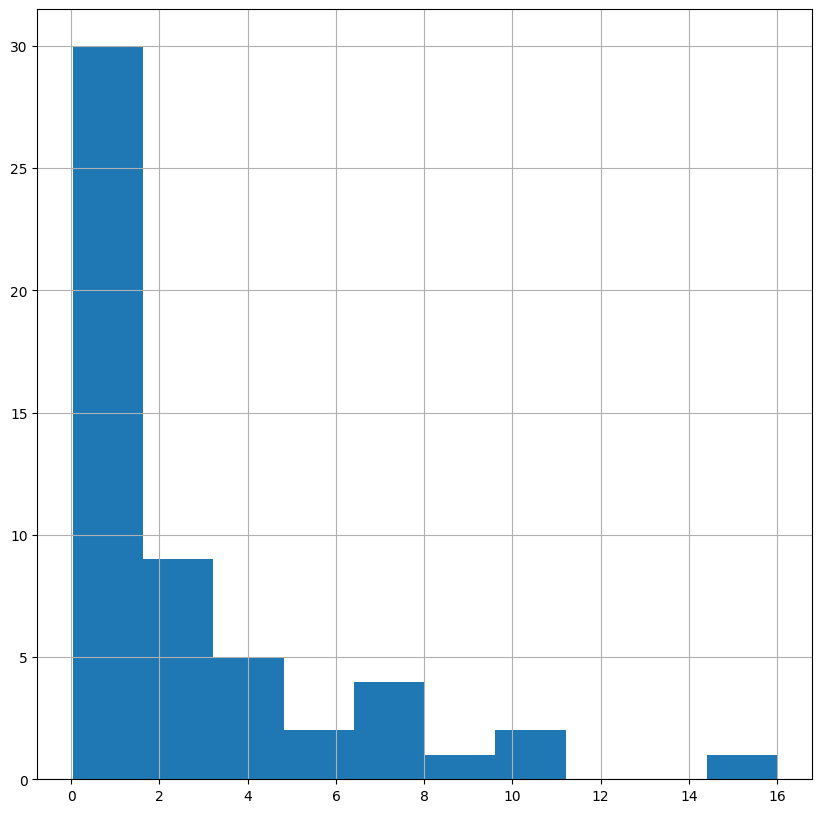

In [ ]:
_ = df['CAR-T cell infused Dose 106/kg'].hist(figsize=(10, 10), bins=10)

#PERSISTENT HOMOLOGY

In [ ]:
""" Connectivity information
0-dimensional homology β0 or H0, measures clusters;
1-dimensional homology1 β1 or H1, measures loops; and
2- dimensional homology β2 or H2, measures voids (empty spaces) """
homology_dimensions = [0, 1, 2]
VR = VietorisRipsPersistence(
                    homology_dimensions=homology_dimensions,
                    coeff=3,
                    n_jobs=-1
)
#plot persistence diagram
diagram =VR.fit_transform(np.array(df)[None, : , :])
VR.fit_transform_plot(np.array(df).reshape(1,*np.array(df).shape))
#scale the persistence diagram
diagramScaler = Scaler()
scaled = diagramScaler.fit_transform(diagram)
diagramScaler.plot(scaled, sample=0)
# persistence entropy
persistence_entropy = PersistenceEntropy()
# calculate topological feature matrix
feat_matrix = persistence_entropy.fit_transform(diagram)# expect shape - (n_point_clouds, n_homology_dims)feat_matrix.shape
#Plot a sample from a collection of Betti curves
BC = BettiCurve()
y_betti_curves = BC.fit_transform(diagram)
BC.plot(y_betti_curves)


In [ ]:
Y = df['Response_CR'].values
features = df.columns.values
X = df.loc[:, 'CAR-T cell infused Dose 106/kg':'Malignancy_MCL'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=666)
# binarize y_train, y_test for creating labels
label_train = pd.cut(y_train, bins=[-3.0,  0.0, 1.5], labels=[0, 1])
label_test = pd.cut(y_test, bins=[-3.0,  0.0, 1.5], labels=[0, 1])
#PIPELINE 1. Binary classification
steps = [
("persistence", VietorisRipsPersistence(metric="euclidean", homology_dimensions=[0, 1, 2], n_jobs=-1)),
("entropy", PersistenceEntropy()),
("model", RandomForestClassifier(n_estimators=500)
)]
pipeline1 = Pipeline(steps, verbose=False)


In [ ]:
pipeline1["model"].fit(np.array(X_train), np.array(label_train))
y_pred1 = pipeline1["model"].predict(np.array(X_test))
test_mse1 = accuracy_score(np.array(label_test), y_pred1)
print(f'Classification Accuracy Score  using topological data = {test_mse1*100:.1f} %')


Classification Accuracy Score  using topological data = 57.1 %


In [ ]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train,label_train)
y_std_pred = rf.predict(X_test)
test_mse_std = mean_squared_error(label_test, y_std_pred)
print(f'Classification Accuracy Score using a standard sklearn.ensemble algorithm = {test_mse_std*100:.1f} %')

Classification Accuracy Score using a standard sklearn.ensemble algorithm = 42.9 %


#MAPPER

In [ ]:
from gtda.mapper import (
    CubicalCover,
    OneDimensionalCover,
    make_mapper_pipeline,
    Projection,
    plot_static_mapper_graph,
    plot_interactive_mapper_graph)
from gtda.mapper import Eccentricity, Entropy
from sklearn.cluster import DBSCAN

In [ ]:
!pip uninstall umap
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=47b701008dded49d5849c19b1f1f87431bb64cbfb34ff184319201489d073fd9
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=8d31c7ff5fd561edf0e0a8aed7de9646a268f5cf487a093e2d10ed8bfa5c73c3
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
import umap.umap_ as umap
import plotly.express as px
features = df.loc[:, 'Response_CR':'Response_SD']
n_neighbors=10
min_dist=0.5
umap_2d = umap.UMAP(n_neighbors=n_neighbors,
                    n_components=2,
                    min_dist=min_dist,
                    init='random',
                    random_state=0) 
umap_3d = umap.UMAP(n_neighbors=n_neighbors,
                    n_components=3,
                    min_dist=min_dist,
                    init='random',
                    random_state=0)
proj_2d = umap_2d.fit_transform(df.drop(columns='Response_CR'))
proj_3d = umap_3d.fit_transform(df.drop(columns='Response_CR'))
fig_2d = px.scatter( proj_2d, x=0, y=1,
                   color=df['Response_CR'], 
                   labels={'color': 'Response_CR'}
)
fig_3d = px.scatter_3d(proj_3d, x=0, y=1, z=2,
                      color=df['Response_CR'], 
                      labels={'color': 'Response_CR'}
)
fig_2d.update_layout(title='UMAP projection 2D and 3D')
fig_3d.update_traces(marker_size=5)
fig_2d.update_layout({'plot_bgcolor': 'aliceblue' , 'paper_bgcolor': 'white',}, template='plotly_white')
fig_3d.update_layout({'plot_bgcolor': 'aliceblue' , 'paper_bgcolor': 'white',}, template='plotly_white')
fig_2d.show()
fig_3d.show()

In [ ]:
#build a pipeline for mapper algorithm
make_mapper_pipeline()

MapperPipeline(steps=[('pullback_cover',
                       ListFeatureUnion(transformer_list=[('clustering_preprocessing',
                                                           FunctionTransformer(validate=True)),
                                                          ('map_and_cover',
                                                           Pipeline(steps=[('scaler',
                                                                            FunctionTransformer()),
                                                                           ('filter_func',
                                                                            PCA(n_components=2)),
                                                                           ('cover',
                                                                            CubicalCover())]))])),
                      ('clustering', ParallelClustering(clusterer=DBSCAN())),
                      ('nerve', Nerve())])

In [ ]:
""" 1. Define filter function – can be any scikit-learn transformer.It is returning a selection of columns of the data """
filter_func = Eccentricity(metric= 'euclidean') #Eccentricities of points in a point cloud or abstract metric space.
""" 2. Define cover """
cover = CubicalCover(n_intervals=30, overlap_frac=0.3)
""" 3. Choose clustering algorithm – default is DBSCAN """
clusterer = DBSCAN(eps=8, min_samples=3, metric='euclidean')
""" 4. Initialise pipeline """
pipe_mapper = make_mapper_pipeline( 
filter_func=filter_func, cover=cover, clusterer=clusterer, verbose=False, n_jobs=-1
)

In [ ]:
data = df.drop(['Response_CR', 'Response_NR', 'Response_PD', 'Response_PR', 'Response_SD'], axis=1)


In [ ]:
from sklearn.metrics import silhouette_score
import sklearn.metrics as metrics

In [ ]:
#data = df.drop(columns='Response _CR', 'Response _NR', 'Response _PD', 'Response _PR', 'Response _SD')
#Check the cluster performance
db = clusterer.fit(data)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
"""The best value of Silhouette score is 1, and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar."""
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(proj_3d, labels))

Estimated number of clusters: 1
Estimated number of noise points: 2
Silhouette Coefficient: 0.083


In [ ]:
plotly_params = {"node_trace": {"marker_colorscale": "RdBu"}}
fig = plot_static_mapper_graph(
    pipe_mapper, data, layout='fruchterman_reingold', node_scale =20, plotly_params=plotly_params
)
fig.show(config={'scrollZoom': True})

#add

In [ ]:
file_location = '/content/Cytokine value-bed ck.xlsx'
df = pd.read_excel(file_location)
df

,IL2,IL4,IL5,IL6,IL7,IL8,IL10,Cohort
0,0.907477,3.270133,0.750665,1.941431,0.430000,23.406955,1.290000,donor
1,0.680001,6.232565,1.324947,0.509458,0.430000,20.023346,1.290300,donor
2,1.529597,3.270000,0.350205,5.812509,0.430000,14.259841,1.290000,donor
3,0.680000,6.973260,1.425078,0.320672,0.430000,20.286808,1.290016,donor
4,0.870156,3.270000,0.686822,5.661574,0.430000,23.572756,1.290000,donor
...,...,...,...,...,...,...,...,...
95,0.474100,2.972994,0.040000,1.440060,0.120000,58.977366,1.338154,patient
96,1.651251,1.090014,0.271123,19.370359,0.177402,50.174809,4.206750,patient
97,1.837974,1.090061,0.040001,18.915645,0.120000,79.422746,2.840021,patient
98,0.050111,1.103454,8.241436,3.976316,0.135321,46.813972,1.634926,patient


In [ ]:
import umap.umap_ as umap
import plotly.express as px
features = df.loc[:, 'Cohort']
n_neighbors=10
min_dist=0.5
umap_2d = umap.UMAP(n_neighbors=n_neighbors,
                    n_components=2,
                    min_dist=min_dist,
                    init='random',
                    random_state=0) 
umap_3d = umap.UMAP(n_neighbors=n_neighbors,
                    n_components=3,
                    min_dist=min_dist,
                    init='random',
                    random_state=0)
proj_2d = umap_2d.fit_transform(df.drop(columns='Cohort'))
proj_3d = umap_3d.fit_transform(df.drop(columns='Cohort'))
fig_2d = px.scatter( proj_2d, x=0, y=1,
                   color=df['Cohort'], 
                   labels={'color': 'Cohort'}
)
fig_3d = px.scatter_3d(proj_3d, x=0, y=1, z=2,
                      color=df['Cohort'], 
                      labels={'color': 'Cohort'}
)
fig_2d.update_layout(title='UMAP projection 2D and 3D')
fig_3d.update_traces(marker_size=5)
fig_2d.update_layout({'plot_bgcolor': 'aliceblue' , 'paper_bgcolor': 'white',}, template='plotly_white')
fig_3d.update_layout({'plot_bgcolor': 'aliceblue' , 'paper_bgcolor': 'white',}, template='plotly_white')
fig_2d.show()
fig_3d.show()

In [ ]:
df = pd.get_dummies(df, columns=['Cohort'])

In [ ]:
homology_dimensions = [0, 1, 2]
VR = VietorisRipsPersistence(
                    homology_dimensions=homology_dimensions,
                    coeff=3,
                    n_jobs=-1
)
#plot persistence diagram
diagram =VR.fit_transform(np.array(df)[None, : , :])
VR.fit_transform_plot(np.array(df).reshape(1,*np.array(df).shape))
#scale the persistence diagram
diagramScaler = Scaler()
scaled = diagramScaler.fit_transform(diagram)
diagramScaler.plot(scaled, sample=0)
# persistence entropy
persistence_entropy = PersistenceEntropy()
# calculate topological feature matrix
feat_matrix = persistence_entropy.fit_transform(diagram)# expect shape - (n_point_clouds, n_homology_dims)feat_matrix.shape
#Plot a sample from a collection of Betti curves
BC = BettiCurve()
y_betti_curves = BC.fit_transform(diagram)
BC.plot(y_betti_curves)

In [ ]:
df


In [ ]:
Y = df['Cohort_donor'].values
features = df.columns.values
X = df.loc[:, 'IL2':'IL10'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=666)
# binarize y_train, y_test for creating labels
label_train = pd.cut(y_train, bins=[-3.0,  0.0, 1.5], labels=[0, 1])
label_test = pd.cut(y_test, bins=[-3.0,  0.0, 1.5], labels=[0, 1])
#PIPELINE 1. Binary classification
steps = [
("persistence", VietorisRipsPersistence(metric="euclidean", homology_dimensions=[0, 1, 2], n_jobs=-1)),
("entropy", PersistenceEntropy()),
("model", RandomForestClassifier(n_estimators=500)
)]
pipeline1 = Pipeline(steps, verbose=False)


In [ ]:
pipeline1["model"].fit(np.array(X_train), np.array(label_train))
y_pred1 = pipeline1["model"].predict(np.array(X_test))
test_mse1 = accuracy_score(np.array(label_test), y_pred1)
print(f'Classification Accuracy Score  using topological data = {test_mse1*100:.1f} %')



Classification Accuracy Score  using topological data = 100.0 %


In [ ]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train,label_train)
y_std_pred = rf.predict(X_test)
test_mse_std = mean_squared_error(label_test, y_std_pred)
print(f'Classification Accuracy Score using a standard sklearn.ensemble algorithm = {test_mse_std*100:.1f} %')

Classification Accuracy Score using a standard sklearn.ensemble algorithm = 0.0 %


In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X, Y, test_size=0.1, random_state = 123
)

print("Train:")
print(f"\tX: {Xtrain.shape}; Y: {Ytrain.shape}")
print("Test:")
print(f"\tX: {Xtest.shape}; Y: {Ytest.shape}")

Train:
	X: (90, 7); Y: (90,)
Test:
	X: (10, 7); Y: (10,)


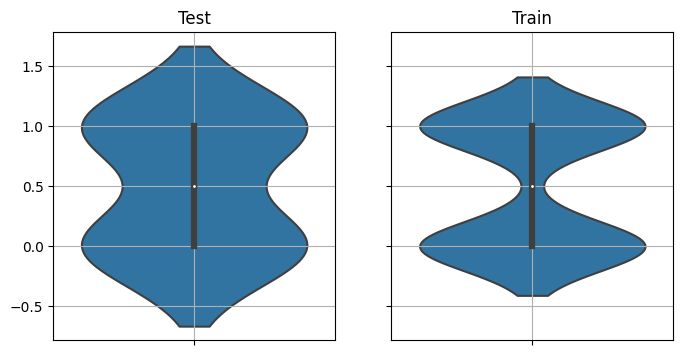

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

for ax, title, data in zip(axes, ["Test", "Train"], [Ytest, Ytrain]):
  sns.violinplot(y=data, ax=ax)
  ax.grid()
  ax.set_title(title)

In [ ]:
from sklearn.metrics import r2_score
enet = RandomForestClassifier(n_estimators=500)

y_pred_enet = enet.fit(Xtrain, Ytrain).predict(Xtest)
r2_score_enet = r2_score(Ytest, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)
#test_mse_std = mean_squared_error(label_test, y_std_pred)
#print(f'Classification Accuracy Score using a standard sklearn.ensemble algorithm = {test_mse_std*100:.1f} %')
test_mse_std = mean_squared_error(Ytest, y_pred_enet)
print(f'Classification Accuracy Score using a standard sklearn.ensemble algorithm = {test_mse_std*100:.1f} %')


RandomForestClassifier(n_estimators=500)
r^2 on test data : 0.600000
Classification Accuracy Score using a standard sklearn.ensemble algorithm = 10.0 %


##Method "RTD-AE"

In [ ]:
!pip install git+https://github.com/simonzhang00/ripser-plusplus.git
!pip install git+https://github.com/IlyaTrofimov/RTD.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/simonzhang00/ripser-plusplus.git to /tmp/pip-req-build-7_5j7fe6
  Running command git clone --filter=blob:none --quiet https://github.com/simonzhang00/ripser-plusplus.git /tmp/pip-req-build-7_5j7fe6
  Resolved https://github.com/simonzhang00/ripser-plusplus.git to commit 30243c0c752de26d7fdf6e41f08bf7b840ca4744
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
  Created wheel for ripserplusplus: filename=ripserplusplus-1.1.3-cp310-cp310-linux_x86_64.whl size=1789906 sha256=3b0e1c92f6e416013c94e52d1012bf23ae5c4cb2fc153e16dd8bef5b58208035
  Stored in directory: /tmp/pip-ephem-wheel-cache-srwkle2q/wheels/0e/ba/fa/b0e13a51d380910fa3550fe884e5899867be8161c9e7f4bc8e
Successfully built ripserplusplus
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://

In [ ]:
file_location = '/content/donors.xlsx'
D = pd.read_excel(file_location)

file_location = '/content/patients.xlsx'
P = pd.read_excel(file_location)

In [ ]:
D = D.to_numpy()
P = P.to_numpy()

In [ ]:
import numpy as np
import rtd

barc = rtd.calc_embed_dist(D, P)
rtd.plot_barcodes(rtd.barc2array(barc))

In [ ]:
rtd.rtd(D, P)